<a href="https://colab.research.google.com/github/thanit456/NeuroSummary/blob/two/headline_thaigov_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import re

from sklearn.model_selection import train_test_split
from tqdm import tqdm 
import copy 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
old_df = pd.read_pickle('/content/drive/Shared drives/NeuroSummary/data/all_deepcut_thaigov_1_24.pkl')
df = pd.DataFrame({'content': old_df['tokenized_deepcut_content'], 'headline': old_df['tokenized_deepcut_headline'], 'class': old_df['class_name']})

In [4]:
print(old_df.columns)

Index(['file_name', 'raw_content', 'reference', 'headline', 'date', 'content',
       'tokenized_deepcut_content', 'tokenized_deepcut_headline',
       'removed_stopwords_content', 'removed_stopwords_headline',
       'class_name'],
      dtype='object')


In [0]:
df_stop = pd.DataFrame({'content': old_df['removed_stopwords_content'], 'headline': old_df['removed_stopwords_headline'], 'class': old_df['class_name']})

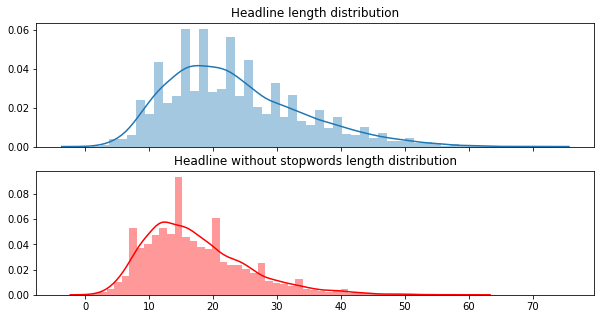

In [29]:
headline_dist = list(map(lambda x: len(x), list(df['headline'])))
headline_stop_dist = list(map(lambda x: len(x), list(df_stop['headline'])))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

ax1.title.set_text('Headline length distribution')
sns.distplot(headline_dist, ax=ax1);
ax2.title.set_text('Headline without stopwords length distribution')
sns.distplot(headline_stop_dist, ax=ax2, color='r');


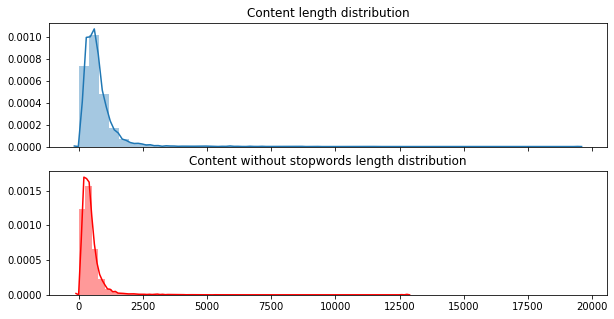

In [32]:
content_dist = list(map(lambda x: len(x), list(df['content'])))
content_stop_dist = list(map(lambda x: len(x), list(df_stop['content'])))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

ax1.title.set_text('Content length distribution')
sns.distplot(content_dist, ax=ax1);
ax2.title.set_text('Content without stopwords length distribution')
sns.distplot(content_stop_dist, ax=ax2, color='r');


In [0]:
def remove_space_special(content_arr) :
  return list(filter(lambda x: x not in " (){}!,'`<>=@_:;,\'\"\\”“‘’",np.array(content_arr)))

df.headline = df.headline.apply(remove_space_special)
df.content = df.content.apply(remove_space_special)
df_stop.headline = df_stop.headline.apply(remove_space_special)
df_stop.content = df_stop.content.apply(remove_space_special)

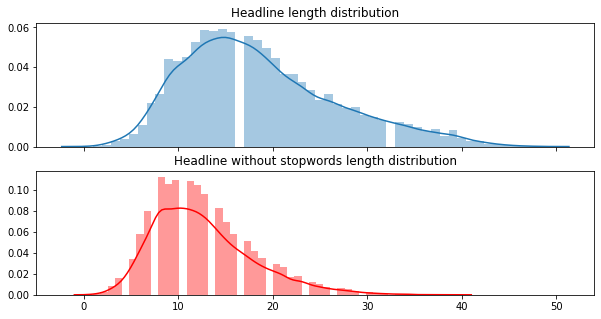

In [35]:
headline_dist = list(map(lambda x: len(x), list(df['headline'])))
headline_stop_dist = list(map(lambda x: len(x), list(df_stop['headline'])))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

ax1.title.set_text('Headline length distribution')
sns.distplot(headline_dist, ax=ax1);
ax2.title.set_text('Headline without stopwords length distribution')
sns.distplot(headline_stop_dist, ax=ax2, color='r');


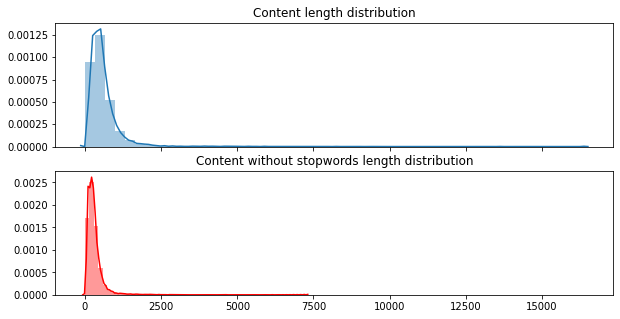

In [36]:
content_dist = list(map(lambda x: len(x), list(df['content'])))
content_stop_dist = list(map(lambda x: len(x), list(df_stop['content'])))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

ax1.title.set_text('Content length distribution')
sns.distplot(content_dist, ax=ax1);
ax2.title.set_text('Content without stopwords length distribution')
sns.distplot(content_stop_dist, ax=ax2, color='r');


In [37]:
max_len_headline = max(df.headline.apply(lambda x: len(x)))
print("max length headline : ",max_len_headline)
max_len_content = max(df.content.apply(lambda x: len(x)))
print("max length content : ",max_len_content)

print("df shape :" ,df.shape)
max_len_headline_stop = max(df_stop.headline.apply(lambda x: len(x)))
print("max length headline without stopwords: ",max_len_headline_stop)
max_len_content_stop = max(df_stop.content.apply(lambda x: len(x)))
print("max length content without stopwords: ",max_len_content_stop)


max length headline :  48
max length content :  16373
df shape : (17367, 3)
max length headline without stopwords:  39
max length content without stopwords:  7242


In [38]:
df = df[df.content.apply(lambda x: len(x) != 0)]
df.shape

(17337, 3)

# load data tokenized data

In [0]:
import pickle
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/'
with open(THAIGOV_PATH + 'thai_gov_clean_cut.pkl', 'rb') as f:
  df = pickle.load(f)
with open(THAIGOV_PATH + 'thai_gov_stop_clean_cut.pkl', 'rb') as f:
  df_stop = pickle.load(f)


In [46]:
headline_len_dist = [(df.headline[df.headline.apply(lambda x: len(x) <= n)].shape[0],n) for n in range(max_len_headline)]
headline_len_dist

[(0, 0),
 (1, 1),
 (12, 2),
 (55, 3),
 (119, 4),
 (221, 5),
 (400, 6),
 (754, 7),
 (1184, 8),
 (1903, 9),
 (2608, 10),
 (3346, 11),
 (4206, 12),
 (5162, 13),
 (6111, 14),
 (7079, 15),
 (8023, 16),
 (8928, 17),
 (9800, 18),
 (10611, 19),
 (11340, 20),
 (11936, 21),
 (12534, 22),
 (13061, 23),
 (13524, 24),
 (13908, 25),
 (14342, 26),
 (14696, 27),
 (15015, 28),
 (15336, 29),
 (15599, 30),
 (15846, 31),
 (16064, 32),
 (16269, 33),
 (16454, 34),
 (16614, 35),
 (16743, 36),
 (16883, 37),
 (16970, 38),
 (17103, 39),
 (17176, 40),
 (17225, 41),
 (17272, 42),
 (17296, 43),
 (17316, 44),
 (17326, 45),
 (17331, 46),
 (17336, 47)]

In [41]:
headline_stop_len_dist = [(df_stop.headline[df_stop.headline.apply(lambda x: len(x) <= n)].shape[0],n) for n in range(max_len_headline_stop)]
headline_stop_len_dist

[(0, 0),
 (9, 1),
 (41, 2),
 (147, 3),
 (357, 4),
 (802, 5),
 (1564, 6),
 (2618, 7),
 (4100, 8),
 (5497, 9),
 (6948, 10),
 (8376, 11),
 (9757, 12),
 (11027, 13),
 (12117, 14),
 (13029, 15),
 (13798, 16),
 (14471, 17),
 (15019, 18),
 (15478, 19),
 (15870, 20),
 (16217, 21),
 (16443, 22),
 (16683, 23),
 (16839, 24),
 (16970, 25),
 (17068, 26),
 (17149, 27),
 (17217, 28),
 (17263, 29),
 (17294, 30),
 (17318, 31),
 (17334, 32),
 (17344, 33),
 (17358, 34),
 (17360, 35),
 (17363, 36),
 (17364, 37),
 (17366, 38)]

# Determine interested headline length

In [0]:
interest_headline_length = 20

df = df[df.headline.apply(lambda x: len(x) <= interest_headline_length)]
df_stop = df_stop[df_stop.headline.apply(lambda x: len(x) <= interest_headline_length)]

In [48]:
df.shape

(11340, 3)

In [49]:
df.head()

,content,headline,class
1,"[พลเอก ประยุทธ์ จันทร์โอชา, นายก, รัฐมนตรี, ได...","[สรุป, ประเด็น, นายก, รัฐมนตรี, กล่าว, ใน, ราย...",ข่าวทำเนียบรัฐบาล
2,"[รมว., แรงงาน, ยื่น, สัตยาบัน, อนุสัญญา, ILO, ...","[บิ๊กอู๋, ยื่น, สัตยาบัน, C, 188, ต่อ, ILO, แส...",ด้านความมั่นคง
3,"[ออมสิน, จัด, โปรพิเศษ, Thailand, Smart, Money...","[ออมสิน, จัด, โปรโมชั่น, พิเศษ, Thailand, Smar...",ด้านเศรษฐกิจ
7,"[เผย, เป็น, ผล, งาน, สำคัญ, และ, พระไตรปิฎก, ย...","[วธ., ร่วม, กับ, 4, หน่วย, งาน, จัด, งาน, พิธี...",ด้านวัฒนธรรมท่องเที่ยวฯ
8,"[ศาสตราจารย์พิเศษวิศิษฏ์ วิศิษฏ์สรอรรถ, ปลัด, ...","[กระทรวงยุติธรรม, พิจารณา, ร่าง, ระเบียบ, ฯ, ก...",ด้านกฎหมายฯ


In [50]:
df_stop.head()

,content,headline,class
0,"[ธนาคารอาคารสงเคราะห์, ธอส., ประกาศ, มาตรการ, ...","[ธอส., ประกาศ, มาตรการ, บรรเทา, เดือดร้อน, ลูก...",ด้านเศรษฐกิจ
1,"[พลเอก ประยุทธ์ จันทร์โอชา, นายก, รัฐมนตรี, ปร...","[สรุป, ประเด็น, นายก, รัฐมนตรี, รายการศาสตร์, ...",ข่าวทำเนียบรัฐบาล
2,"[รมว., แรงงาน, ยื่น, สัตยาบัน, อนุสัญญา, ILO, ...","[บิ๊กอู๋, ยื่น, สัตยาบัน, C, 188, ILO, เจตนารม...",ด้านความมั่นคง
3,"[ออมสิน, โปรพิเศษ, Thailand, Smart, Money, กรุ...","[ออมสิน, โปรโมชั่น, พิเศษ, Thailand, Smart, Mo...",ด้านเศรษฐกิจ
4,"[ศ.คลินิก, นพ.อุดม คชินทร, รมช., ศธ., ประชุม,...","[ม., มหิดล, เตรียม, ม.บูรพา ผลิต, พัฒนา, คน, ส...",ด้านการศึกษาฯ


In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [0]:
# df['headline']

In [0]:
df['content'].apply(lambda x : x[:50])

In [0]:
train_df, val_test_df = train_test_split(df, test_size=0.33, random_state=42)
val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=123)

# load preprocessed with pickle

In [2]:
import pickle
import numpy as np
import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/'

with open(THAIGOV_PATH + 'train.pkl', 'rb') as f:
  train_df = pickle.load(f)

with open(THAIGOV_PATH + 'val.pkl', 'rb') as f:
  val_df = pickle.load(f)

with open(THAIGOV_PATH + 'test.pkl', 'rb') as f:
  test_df = pickle.load(f)

Using TensorFlow backend.


In [0]:
with open(THAIGOV_PATH + 'train_stop.pkl', 'rb') as f:
  train_stop_df = pickle.load(f)

with open(THAIGOV_PATH + 'val_stop.pkl', 'rb') as f:
  val_stop_df = pickle.load(f)

with open(THAIGOV_PATH + 'test_stop.pkl', 'rb') as f:
  test_stop_df = pickle.load(f)

# Create dictionary

In [0]:
train_set = train_df 
val_set = val_df
test_set = test_df

In [0]:
## ! use only n first words for headline generation
def use_firt_n_words(df_content, n):
  new_ls = []
  for content in df_content:
    new_ls.append(content[:n])
  return new_ls

words_50_train_contents = use_firt_n_words(train_set['content'], n=50)
words_20_train_headlines = use_firt_n_words(train_set['headline'], n=20)
words_50_val_contents = use_firt_n_words(val_set['content'], n=50)
words_20_val_headlines = use_firt_n_words(val_set['headline'], n=20)
# words_70_train_stop_contents = use_firt_n_words(train_set_stop['content'], n=70)
# words_20_train_stop_headlines = use_firt_n_words(train_set_stop['headline'], n=20)

In [6]:
import collections
def create_index(input_data,threshold):
    input_text = [data for data in input_data]
    # counts of word type has to be above or equal threshold
    words = [word for sublist in input_text for word in sublist]
    print("words :",words)
    word_count_all = list()
    word_count = list()
    #use set and len to get the number of unique words
    word_count_all.extend(collections.Counter(words).most_common(len(set(words))))
    unkcnt = 0
    for (word,cnt) in word_count_all:
      if cnt >= threshold:
        word_count.append((word,cnt))
      else:
        unkcnt+=cnt
    #include a token for unknown word
    word_count.append(("UNK",unkcnt))
    #print out 10 most frequent words
    print("top 10: ",word_count[:10])
    print("bottom 10: ",word_count[-10:])
    dictionary = dict()
    dictionary["for_keras_zero_padding"] = 0
    for word in word_count:
      dictionary[word[0]] = len(dictionary)
    dictionary['<s>'] = len(dictionary) 
    dictionary['</s>'] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    
    # for data in input_data:
    #   sub_data = list()
    #   sub_label = list()
    #   error_list = [data[i] for i in range(1,len(data))]

    #   for i in range(len(data[0])):
    #     sub_label.append(0)
    #     for error_range in error_list:
    #       if i>=error_range[0] and i<error_range[1]:
    #         sub_label[-1] = 1
    #         break.
    return dictionary, reverse_dictionary
dict_t, rev_dict_t = create_index(input_data=words_50_train_contents+words_20_train_headlines,threshold=0)
# dict_stop_t, rev_dict_stop_t = create_index(input_data=words_70_train_stop_contents+words_20_train_stop_headlines,threshold=0)
print('Vocab size (Content): ',len(dict_t))
# print('Vocab stop ?size (Content): ',len(dict_stop_t))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



top 10:  [('การ', 18642), ('ที่', 10775), ('และ', 10479), ('ใน', 9161), ('รัฐมนตรี', 8788), ('วัน', 6974), ('เป็น', 5982), ('ผู้', 5891), ('ความ', 5356), ('ให้', 5211)]
bottom 10:  [(' ชี้', 1), ('กระทรวงวิจัย', 1), ('ทวีปแอฟริกา', 1), ('รพ.สต.ชวน', 1), ('ส.คช.', 1), ('เอดส์ ', 1), ('ชักธง', 1), ('สังข์หยด', 1), ('สั่งสร้าง', 1), ('UNK', 0)]
Vocab size (Content):  22122


In [7]:
print('Vocab size: ',len(dict_t))
# print('Vocab stop size (Content): ',len(dict_stop_t))

Vocab size:  22122


In [8]:
dict_t['<s>']
list(dict_t.values())[-5:]

[22117, 22118, 22119, 22120, 22121]

In [0]:
def word_to_idx(input_data,dictionary) :
  X = list()
  for data in input_data:
    sub_data = []
    for word in data:
      if word in dictionary:
        sub_data.append(dictionary[word])
      else:
        sub_data.append(dictionary["UNK"])
    X.append(sub_data)
  return np.array(X)

In [0]:
X_train = word_to_idx(words_50_train_contents,dict_t)
y_train = word_to_idx(words_20_train_headlines,dict_t)
X_val = word_to_idx(words_50_val_contents,dict_t)
y_val = word_to_idx(words_20_val_headlines,dict_t)

# Data generator

In [0]:
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dimX=70,dimY=20, n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dimX = dimX
        self.dimY = dimY
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        label_temp = [self.labels[k] for k in indexes]
        # Generate data
        X, y_shift,y = self.__data_generation(list_IDs_temp,label_temp)
        return [X,y_shift],y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, X,y):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        # X = np.empty((self.batch_size, self.dimX))
        # y = np.empty((self.batch_size, self.dimY))

        # Generate data
        # for i, ID in enumerate(list_IDs_temp):
        #     # Store sample
        #     X[i,] = list_IDs_temp
        
        y = list(map(lambda mem :np.append(mem,[len(dict_t)-1]),y))
        y_shift = list(map(lambda mem :np.append([len(dict_t)-2], mem[:-1]),y))
        X = pad_sequences(X,maxlen=maxlen,padding='post')
        y = pad_sequences(y,maxlen=maxlen_output,padding='post') 
        y_shift = pad_sequences(y_shift,maxlen=maxlen_output,padding='post')
        # X = np.array(keras.utils.to_categorical(X, num_classes=self.n_classes), dtype=object)
        y = np.array(keras.utils.to_categorical(y, num_classes=self.n_classes))
        y_shift = np.array(keras.utils.to_categorical(y_shift, num_classes=self.n_classes))
        return X, y_shift,y

# Modelling

In [0]:
maxlen = 50 
maxlen_output = 20+1 # <s>ABC and ABC</s>
vocab_size = len(dict_t)
output_vocab_size = len(dict_t)
m=15000
Tx=maxlen
Ty=maxlen_output

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply,Add,Conv1D,GRU,TimeDistributed
from keras.layers import RepeatVector, Dense, Activation, Lambda, Embedding,concatenate
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model, Model
from keras.callbacks import ModelCheckpoint,EarlyStopping, TensorBoard
import keras.backend as K

import numpy as np
from datetime import datetime

In [0]:
# from my_classes import DataGenerator

# Parameters
params = {'dimX': maxlen,
          'dimY': maxlen_output,
          'batch_size': 256,
          'n_classes': vocab_size,
          'n_channels': 1,
          'shuffle': True}

# Generators
training_generator = DataGenerator(X_train, y_train, **params)
validation_generator = DataGenerator(X_val, y_val, **params)

In [0]:
# callbacks
curr_datetime = datetime.now().strftime("%Y%m%d-%H%M%S")

drive_path = '/content/drive/My Drive'
checkpoint_path=  drive_path + '/headline_thaigov_generation/weights/' + curr_datetime + "_weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"


callback_list = [     
      ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min'), 
      EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50),
      # ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=100, min_lr=1e-10),
]

In [46]:
training_generator[0][1].shape

(256, 21, 22122)

In [0]:
def define_models(n_input=maxlen,n_output=maxlen_output,n_units=32) :
  #define training encoder model
  encoder_inputs = Input(shape=(maxlen,))
  encoder_embedding = Embedding(vocab_size, n_units)(encoder_inputs)
  encoder  = LSTM(n_units, return_state=True)
  encoder_outputs, state_h, state_c = encoder(encoder_embedding)
  encoder_states = [state_h, state_c]

  # define training decoder model
  decoder_inputs = Input(shape=(maxlen_output,vocab_size ))
  # decoder_embedding = Embedding(vocab_size, n_units)
  # decoder_inputs2 = decoder_embedding(decoder_inputs)
  decoder_lstm = LSTM(n_units, return_state=True, return_sequences=True)
  decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

  # dense_layer = Dense(VOCAB_SIZE, activation='softmax')
  decoder_dense  = Dense(vocab_size, activation='softmax')
  decoder_outputs = decoder_dense(decoder_outputs)
  model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

  #define inferencing encoder model
  encoder_model = Model(encoder_inputs,encoder_states)
  #define inference decoder
  decoder_state_input_h = Input(shape=(n_units,))
  decoder_state_input_c = Input(shape=(n_units,))
  decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
  decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
  decoder_states = [state_h, state_c]
  decoder_outputs = decoder_dense(decoder_outputs)
  decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
  # return all models
  return model,encoder_model,decoder_model


In [18]:
# configure problem
# n_features = 50 + 1
n_steps_in = maxlen
n_steps_out = maxlen_output
train, infenc, infdec = define_models()
# train.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
train.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 32)       707904      input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 21, 22122)    0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 32), (None,  8320        embedding_1[0][0]                
____________________________________________________________________________________________

In [0]:
# model.fit_generator(generator=training_generator)
# model.fit_generator(generator=training_generator,
#                     validation_data=validation_generator,epochs=50)
import keras.backend as K
K.clear_session()
train.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    epochs=300, callbacks=callback_list)

Epoch 1/300
36/36 [==============================] - 22s 613ms/step - loss: 1.3429 - accuracy: 0.7168 - val_loss: 4.7834 - val_accuracy: 0.4156

Epoch 00001: val_loss improved from inf to 4.78340, saving model to /content/drive/My Drive/headline_thaigov_generation/weights/20200507-175353_weights-improvement-01-4.78.hdf5
Epoch 2/300
36/36 [==============================] - 21s 594ms/step - loss: 1.3335 - accuracy: 0.7184 - val_loss: 4.8390 - val_accuracy: 0.4152

Epoch 00002: val_loss did not improve from 4.78340
Epoch 3/300
36/36 [==============================] - 22s 614ms/step - loss: 1.3212 - accuracy: 0.7216 - val_loss: 5.3685 - val_accuracy: 0.4135

Epoch 00003: val_loss did not improve from 4.78340
Epoch 4/300
36/36 [==============================] - 21s 581ms/step - loss: 1.3082 - accuracy: 0.7233 - val_loss: 5.5281 - val_accuracy: 0.4122

Epoch 00004: val_loss did not improve from 4.78340
Epoch 5/300
27/36 [=====================>........] - ETA: 4s - loss: 1.2853 - accuracy: 0.

In [0]:
def predict_sequence(infenc, infdec, source, n_steps, cardinality=vocab_size):
  state = infenc.predict(source)
  target_seq = np.zeros((1, 21, cardinality))
  outputs = list()
  for t in range(n_steps):
    y_hat, h, c = infdec.predict([target_seq] + state)
    # print(y_hat.shape)
    # break
    outputs.append(y_hat[0, t, :])
    state = [h, c]
    target_seq = y_hat
  return outputs

In [44]:
for c in X_train:
  outputs = predict_sequence(infenc, infdec, pad_sequences([c], maxlen=maxlen, padding='post'), maxlen_output, cardinality=vocab_size)
  pred = " ".join([rev_dict_t[np.argmax(x)] for x in outputs])
  print(pred)

โรงพยาบาลสมเด็จพระยุพราช </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
รอง </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
รมว. </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
นายก </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
รมว. </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
รัฐมนตรี </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
ปัญหา </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
รมว. </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
รอง </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
ขสมก. </s> </s> </s> </s> </s> <

KeyboardInterrupt: ignored

In [41]:
maxlen

50